Сегодня мы поговорим об основах разведовательного анализа данных.

Обсудим еще раз базовые приемы, статистики и визуализацию.

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import numpy as np

In [0]:
df = pd.read_csv('https://github.com/Yorko/mlcourse.ai/raw/master/data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


# Численные переменные

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f868df40198>,
      dtype=object)

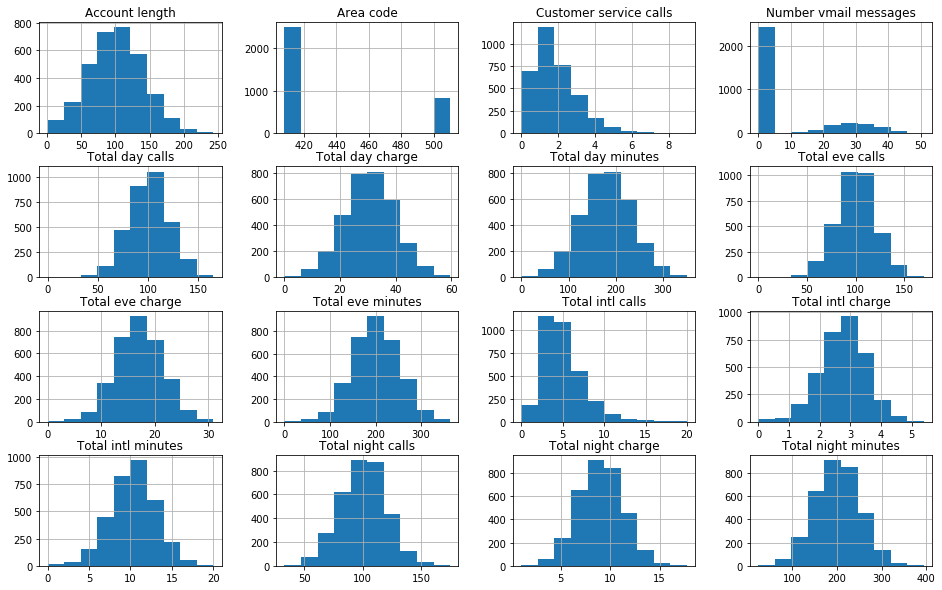

In [5]:
df.select_dtypes(include=np.number).hist()

In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [0]:
df_churn = df[df["Churn"]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f868d431c18>,
      dtype=object)

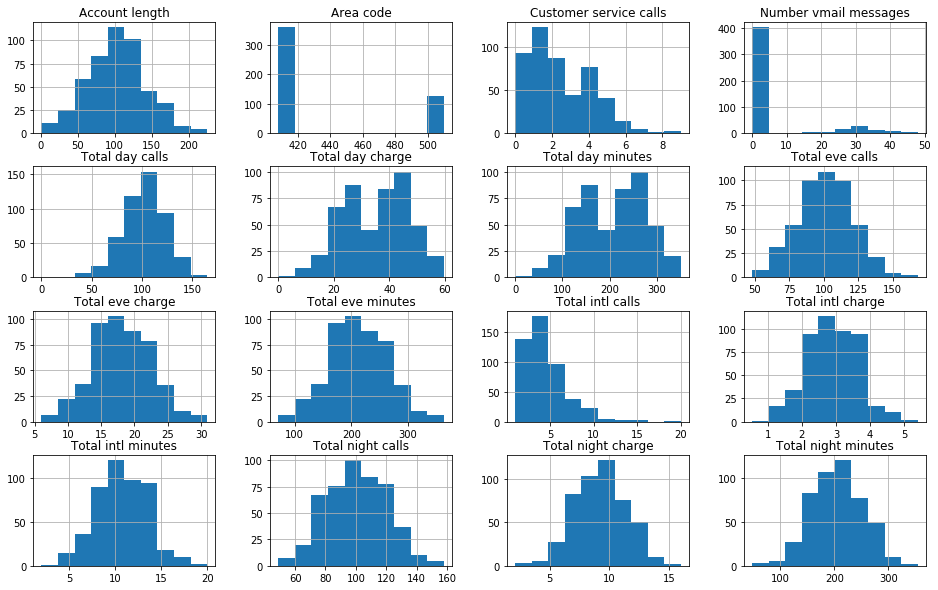

In [8]:
df_churn.select_dtypes(include=np.number).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f868cdbba20>,
      dtype=object)

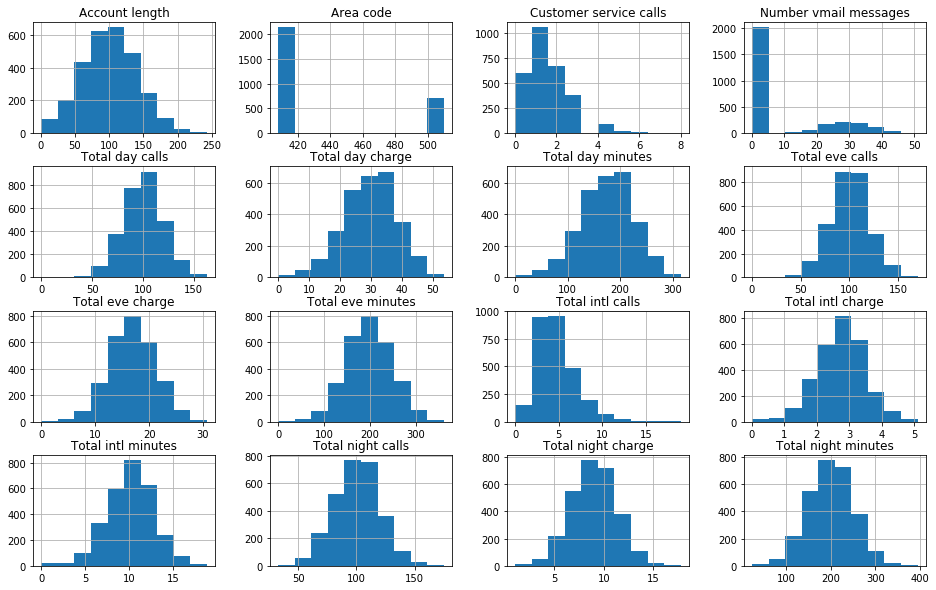

In [9]:
df[~df["Churn"]].select_dtypes(include=np.number).hist()

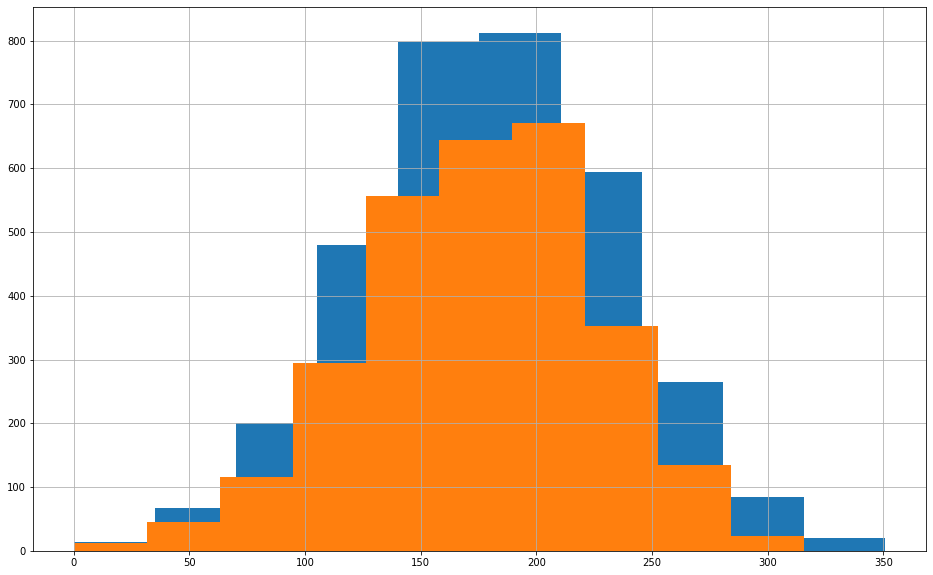

In [10]:
df['Total day minutes'].hist();
df[~df["Churn"]]['Total day minutes'].hist();

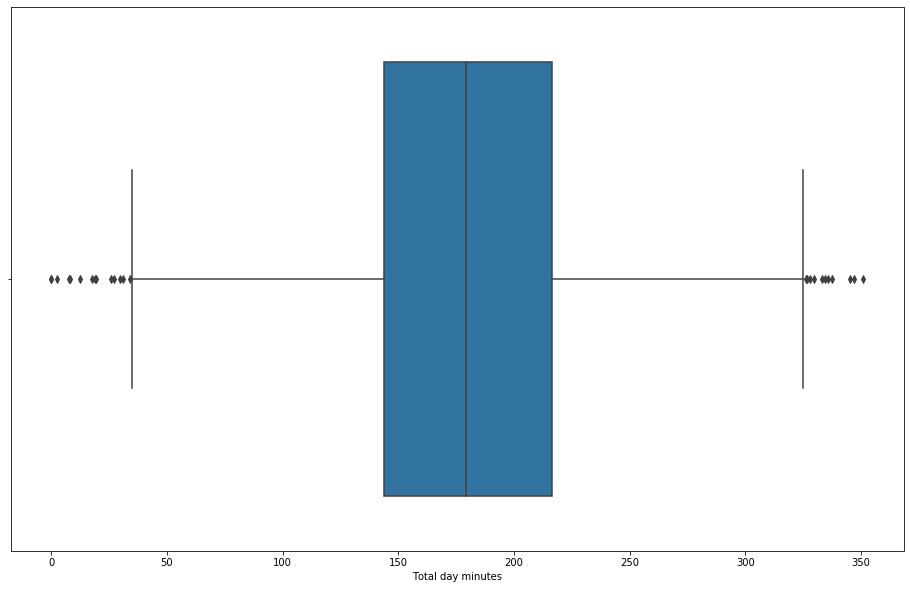

In [11]:
sns.boxplot(df['Total day minutes'])

# Нечисловые переменные

In [12]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [13]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [15]:
df['Area code'].value_counts(normalize = True)

415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

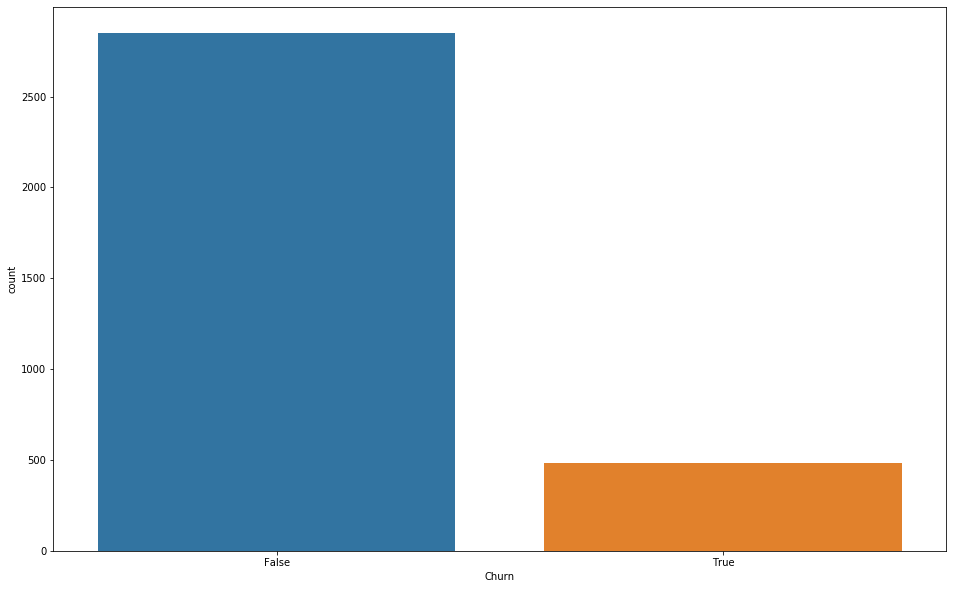

In [16]:
sns.countplot(df['Churn']);

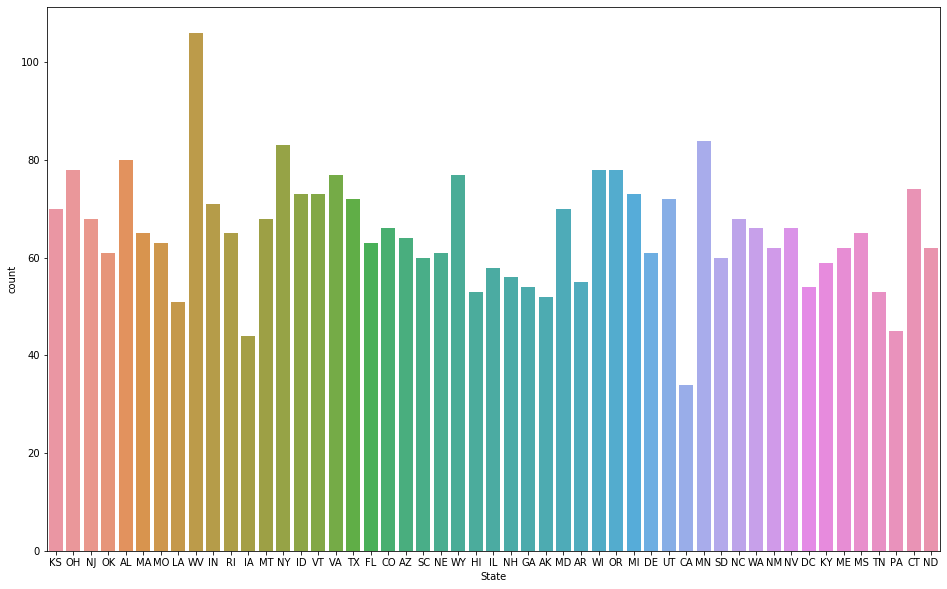

In [17]:
sns.countplot(df['State']);

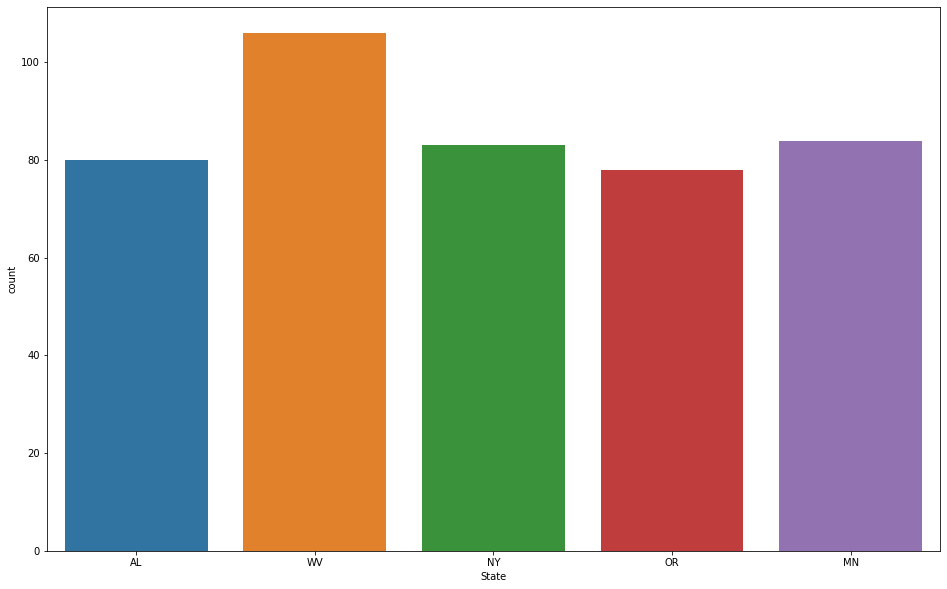

In [18]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State']);

# Взаимодействия признаков
# Количественный с количественным

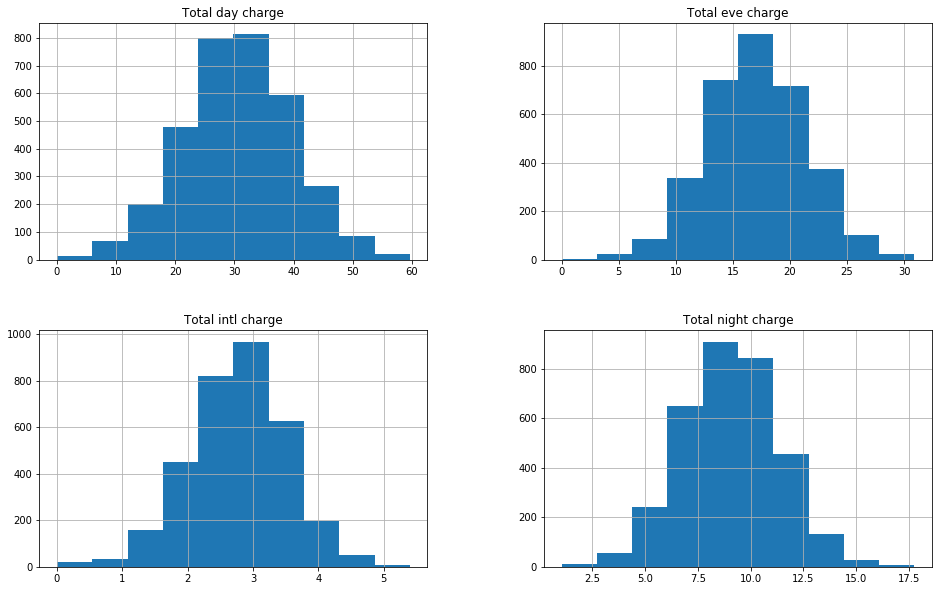

In [19]:
charges = [x for x in df.columns if 'charge' in x]

df[charges].hist();

PairPlot довольно удобный способ бысто посмотреть на особенности данных. https://seaborn.pydata.org/generated/seaborn.pairplot.html

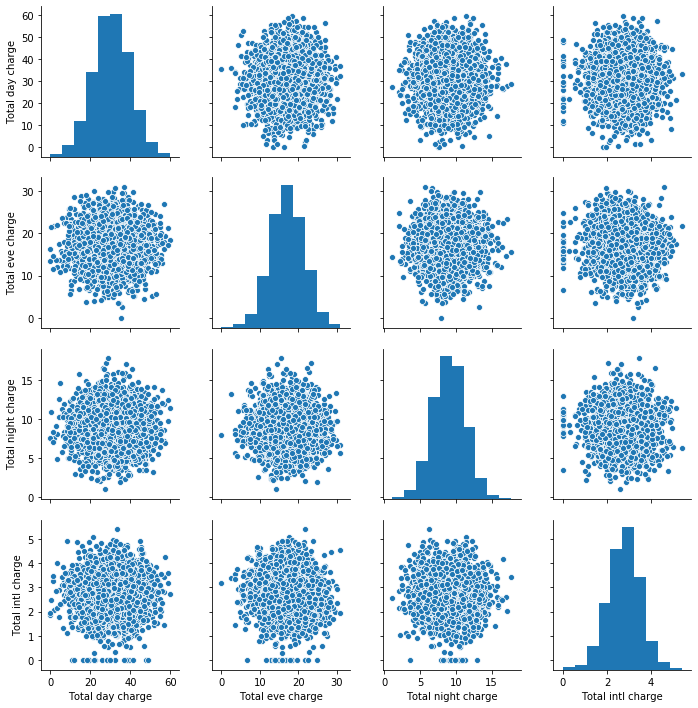

In [20]:
sns.pairplot(df[charges])

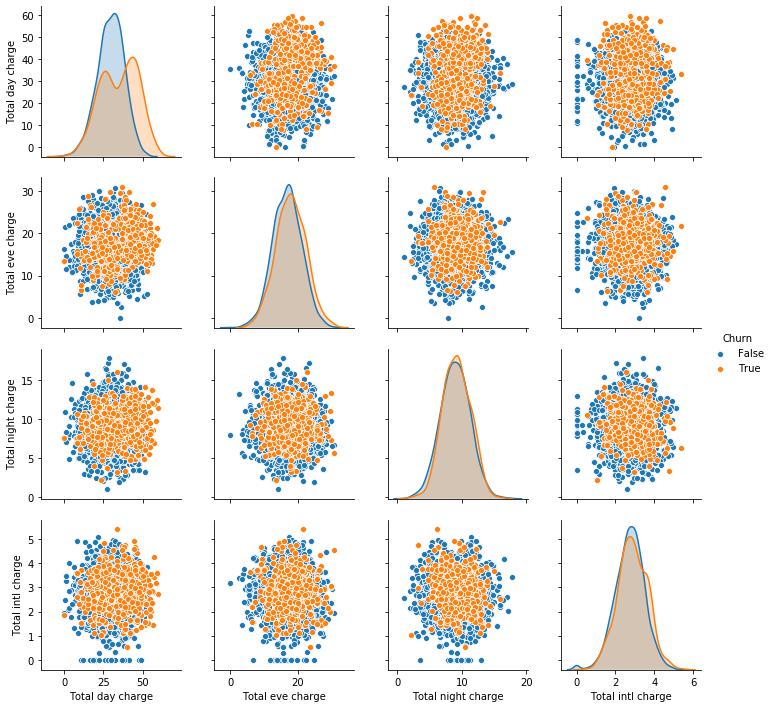

In [21]:
sns.pairplot(df, hue = "Churn", vars = charges)

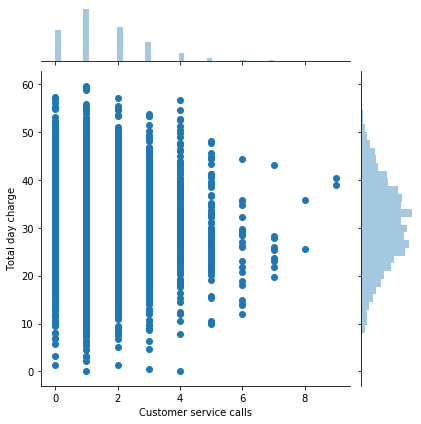

In [22]:
sns.jointplot(x='Customer service calls', y='Total day charge', 
              data=df, kind='scatter');

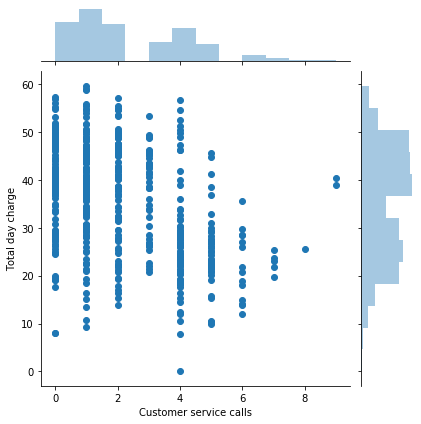

In [23]:
sns.jointplot(x='Customer service calls', y='Total day charge', 
              data=df[df["Churn"]], kind='scatter');

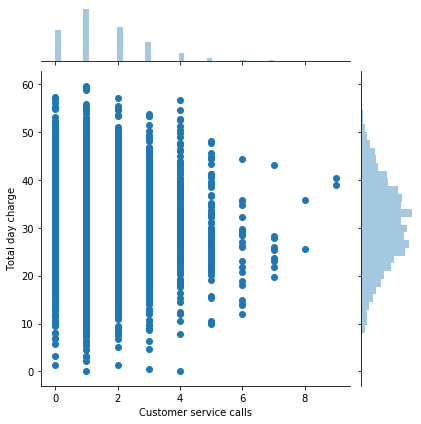

In [24]:
sns.jointplot(x='Customer service calls', y='Total day charge', 
              data=df, kind='scatter');

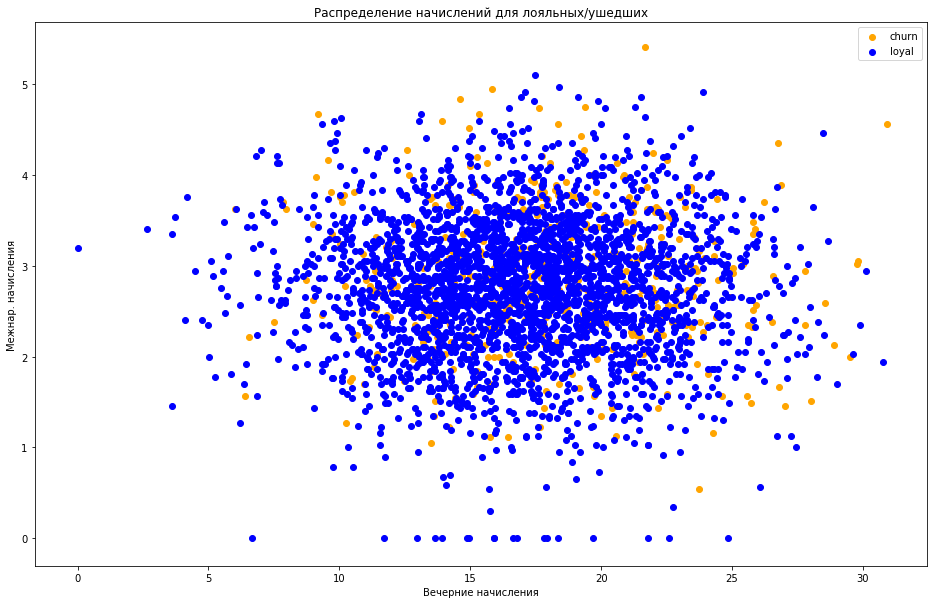

In [25]:
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue', label='loyal');
plt.xlabel('Вечерние начисления');
plt.ylabel('Межнар. начисления');
plt.title('Распределение начислений для лояльных/ушедших');
plt.legend();

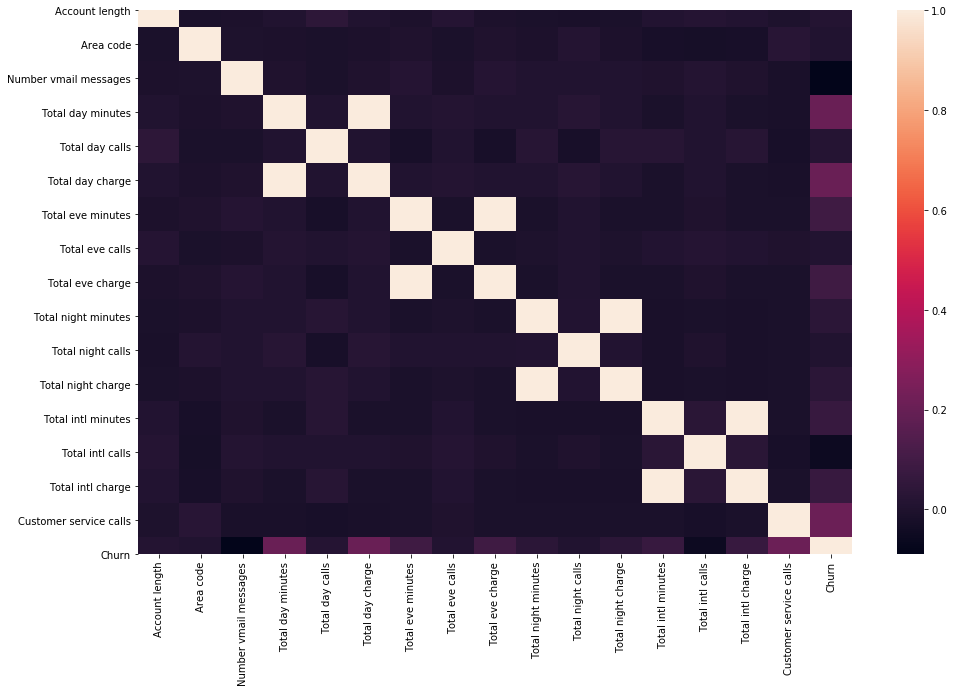

In [26]:
sns.heatmap(df.corr());

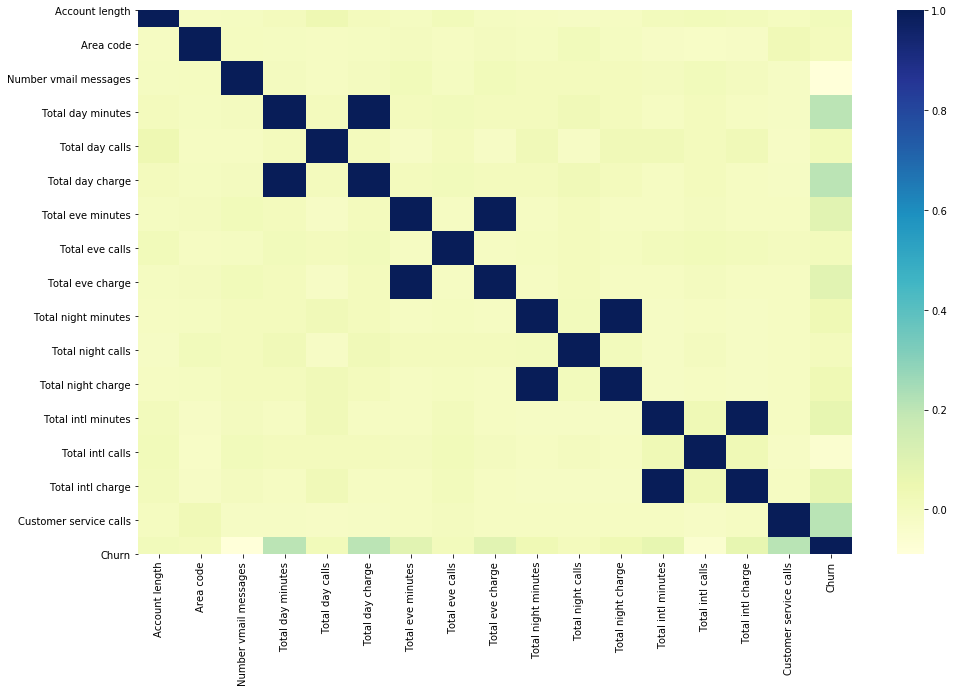

In [27]:
sns.heatmap(df.corr(), cmap="YlGnBu")

In [0]:
df.drop(charges, axis=1, inplace=True)

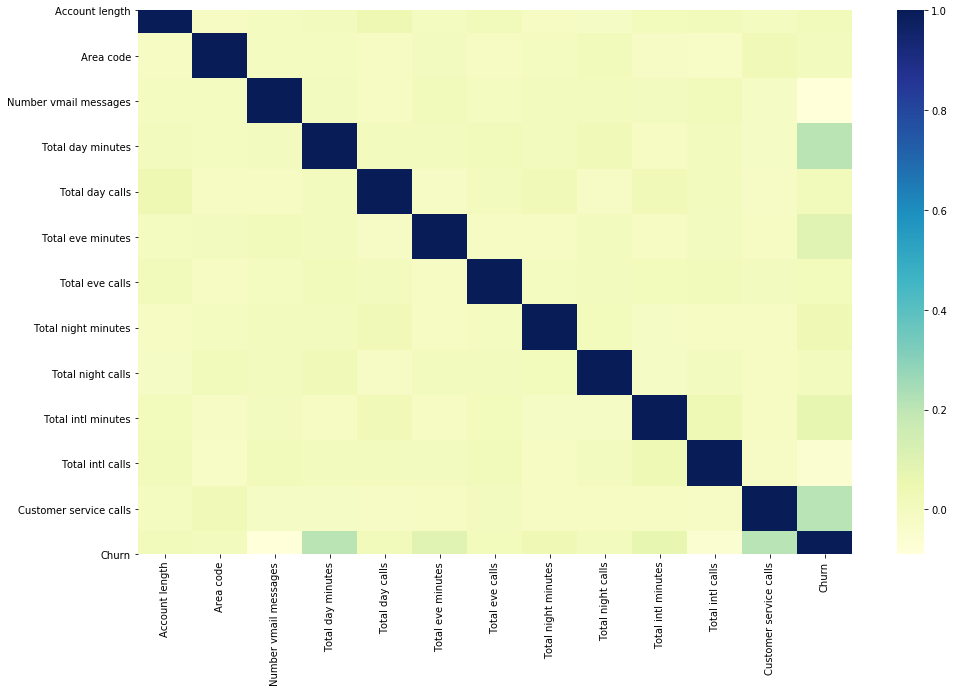

In [29]:
sns.heatmap(df.corr(), cmap="YlGnBu");

# Количественные с категориальными

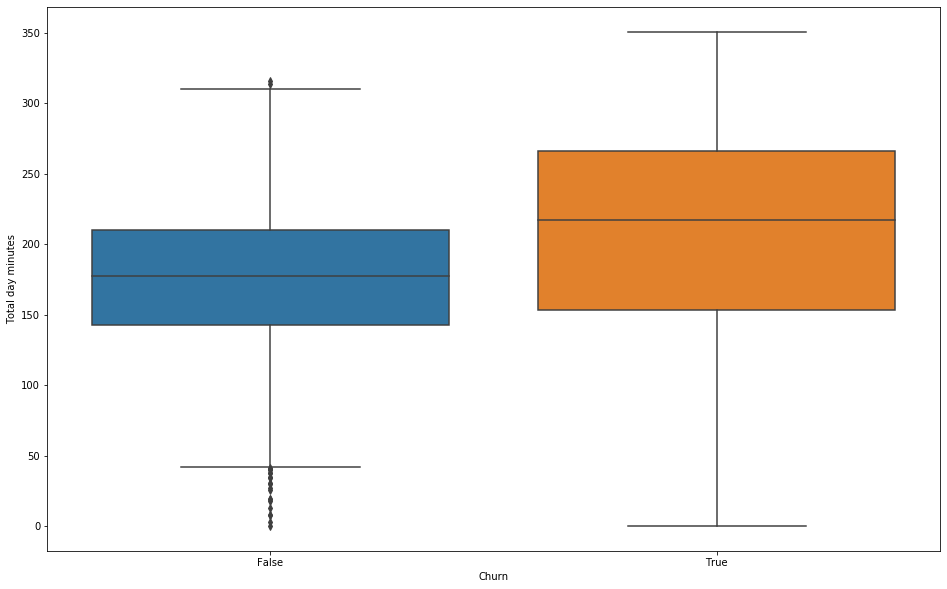

In [30]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)

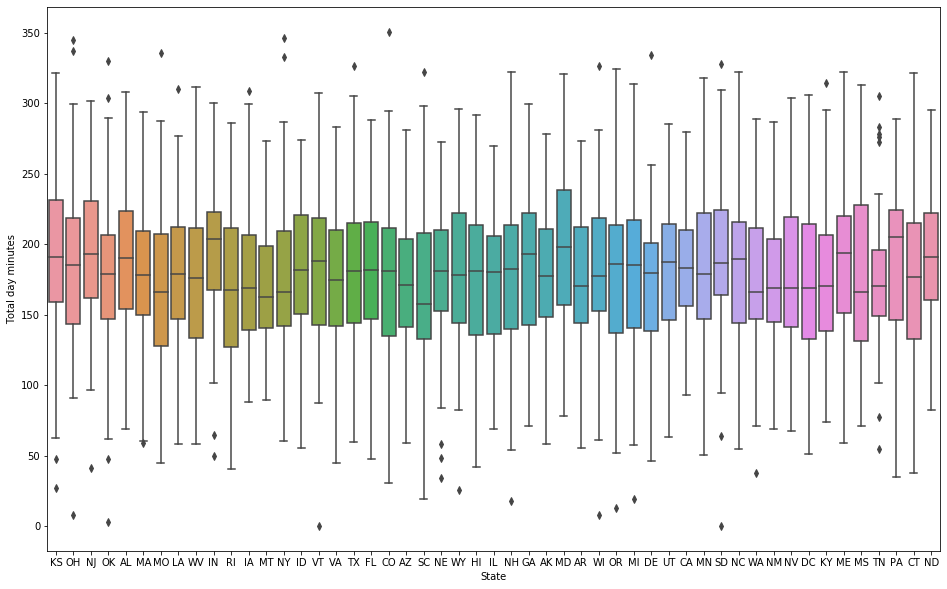

In [31]:
sns.boxplot(x='State', y='Total day minutes', data=df)

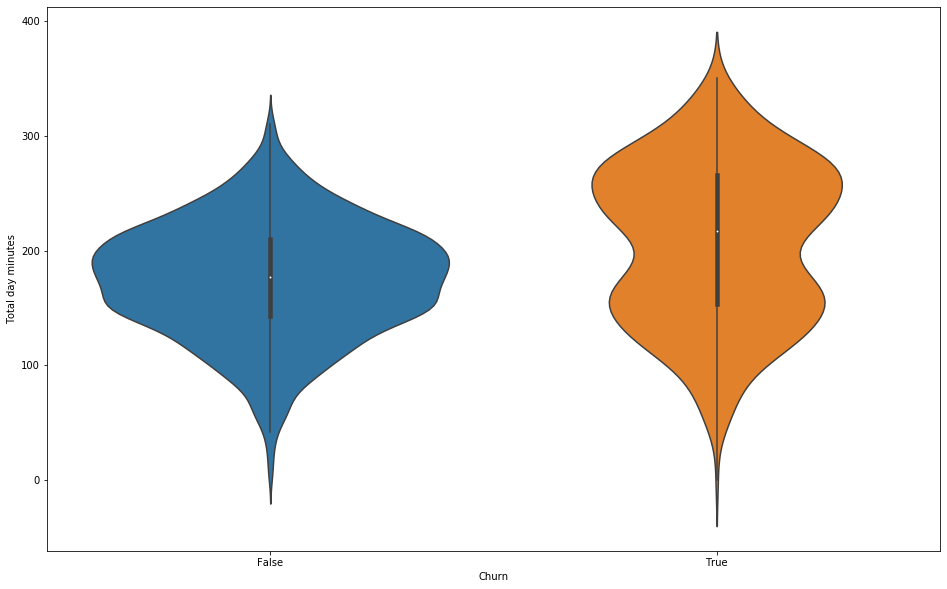

In [32]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

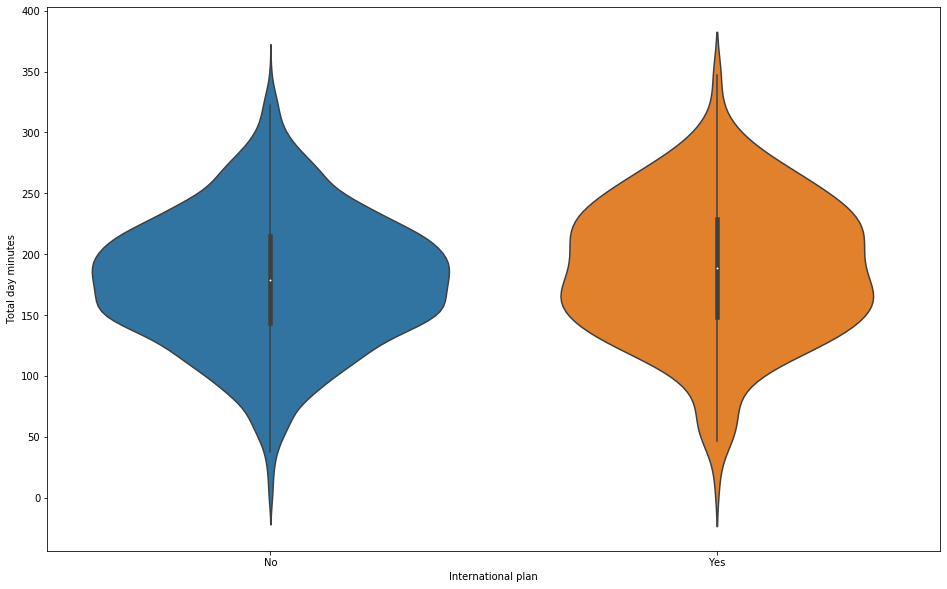

In [35]:
sns.violinplot(x='International plan', y='Total day minutes', data=df);

In [33]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

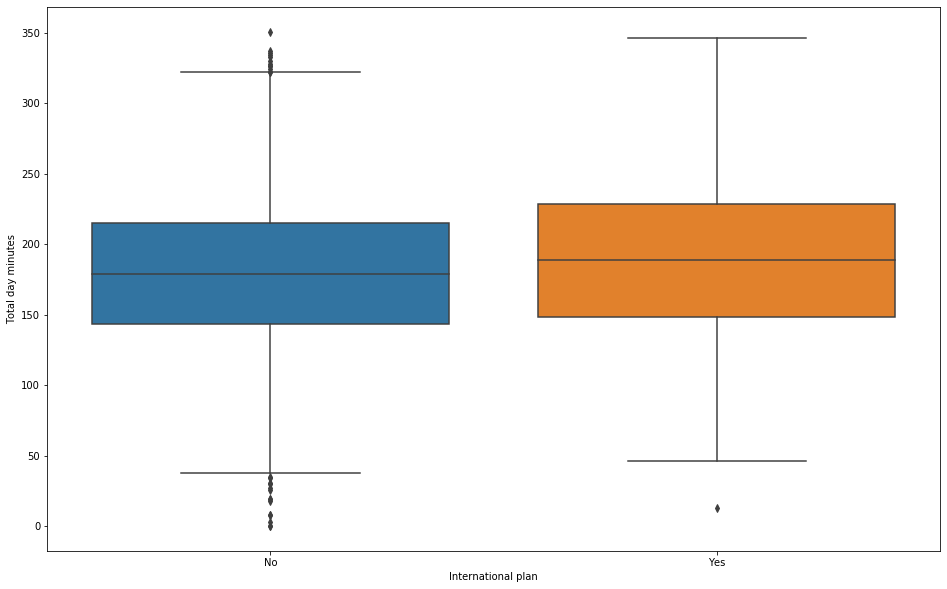

In [34]:
sns.boxplot(x='International plan', y='Total day minutes', data=df)

# Категориальные с категориальными

In [36]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


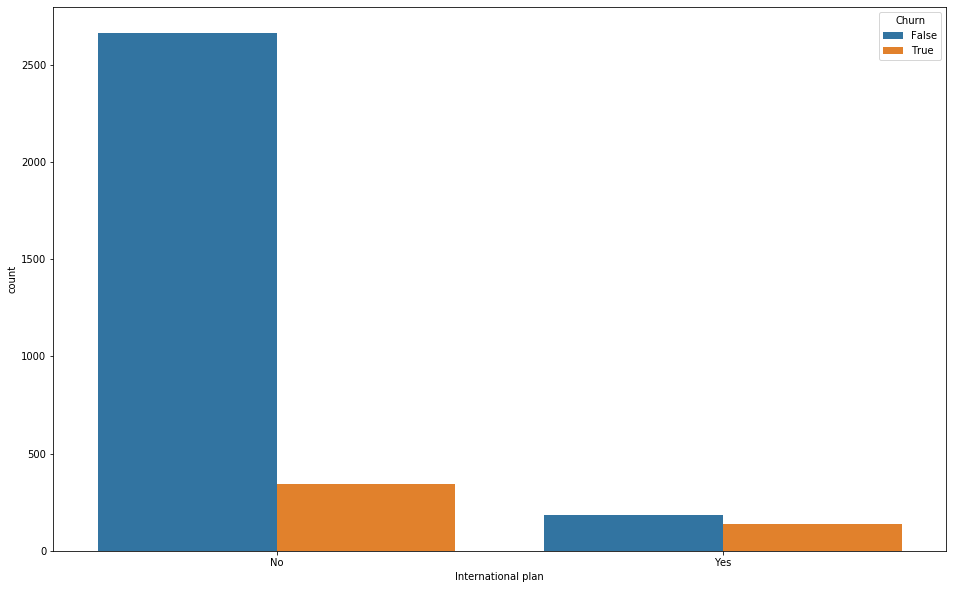

In [37]:
sns.countplot(x='International plan', hue='Churn', data=df);

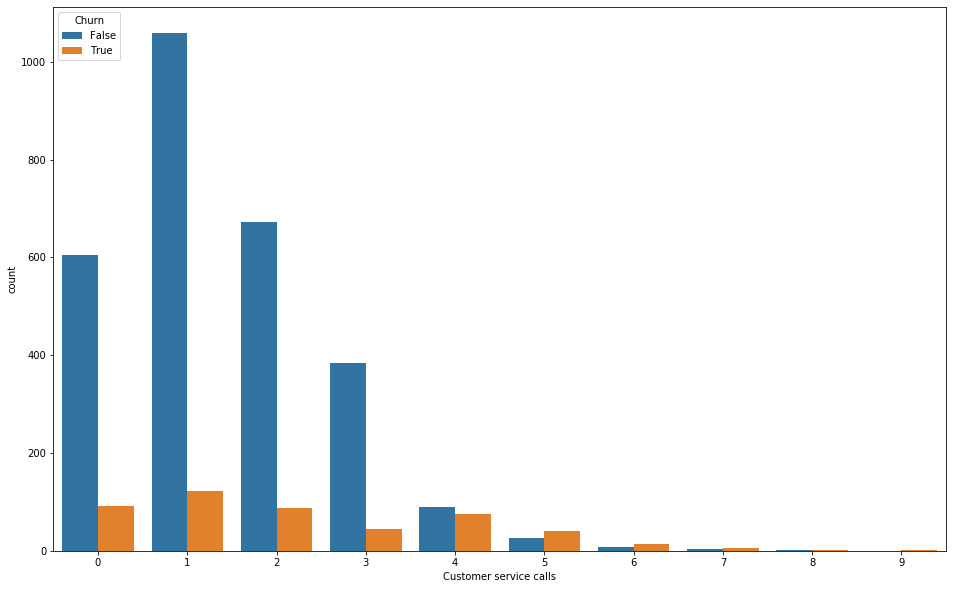

In [38]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

# TSNE

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(random_state=0)

In [0]:
df2 = df.drop(['State', 'Churn'], axis=1)

In [0]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 
                                                             'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 
                                                             'No': 0})

In [43]:
%%time
tsne.fit(df2)

CPU times: user 31.7 s, sys: 114 ms, total: 31.8 s
Wall time: 31.8 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

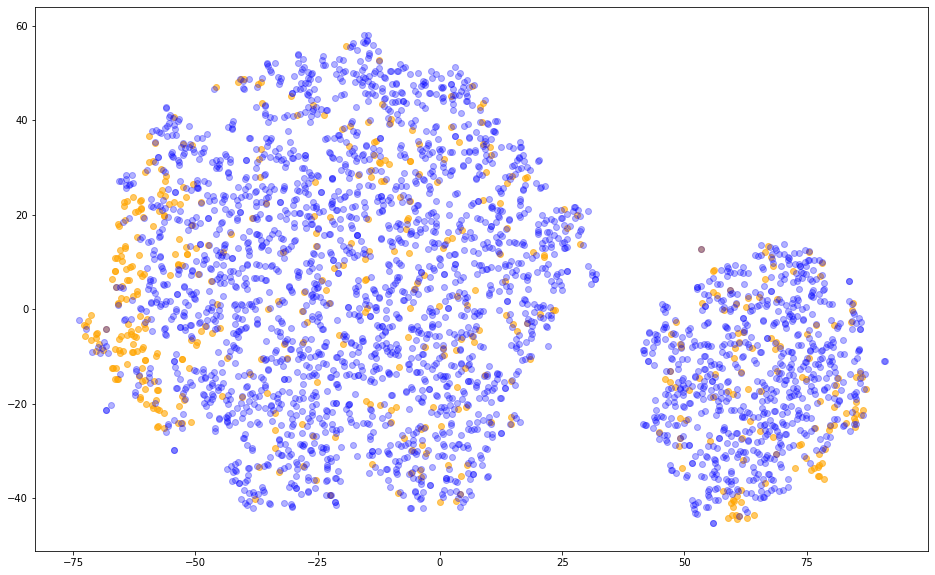

In [44]:
plt.scatter(tsne.embedding_[df['Churn'].values, 0], 
            tsne.embedding_[df['Churn'].values, 1], 
            color='orange', alpha=.6);
plt.scatter(tsne.embedding_[~df['Churn'].values, 0], 
            tsne.embedding_[~df['Churn'].values, 1], 
            color='blue', alpha=.3);